# Factors influencing House Prices in the United States of America

### *Author : George M Cherian*

#### *I have analyzed 2 of the most popular datsets available on Kaggle with respect to real estate pricing and I've given my conclusion below based on the outcome of my analysis as well as on other factors, in my opinion, that could impact residential prices.* 

### Required Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline 

sns.set_style('whitegrid')

### Loading the Datasets

#### *I've separately analyzed the following datasets to find factors that might affect pricing.*
#### 1. _USA Housing -> https://www.kaggle.com/farhankarim1/usa-house-prices_
#### 2. _House Sales in King County -> https://www.kaggle.com/harlfoxem/housesalesprediction_

In [2]:
usa = pd.read_csv('usa.csv')
kc = pd.read_csv('kc.csv')

### Exploratory Data Analysis - King County Dataset

In [3]:
kc['date'] = kc['date'].apply(pd.to_datetime)

In [4]:
kc.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
kc.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [6]:
print("Null Values in King County House Prices dataset\n")
kc.isnull().sum()

Null Values in King County House Prices dataset



id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [7]:
kc.drop(['id'],axis=1,inplace=True)

### Data Visualization

#### To find the price band of the majority of the house purchases

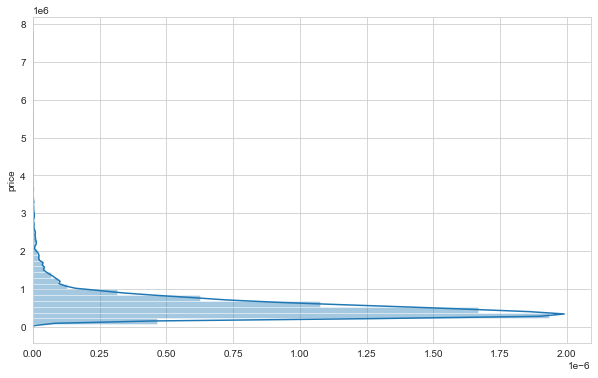

In [8]:
plt.figure(figsize=(10,6))
sns.distplot(kc['price'],vertical=True)

#### Relation between Price and all other factors in this dataset

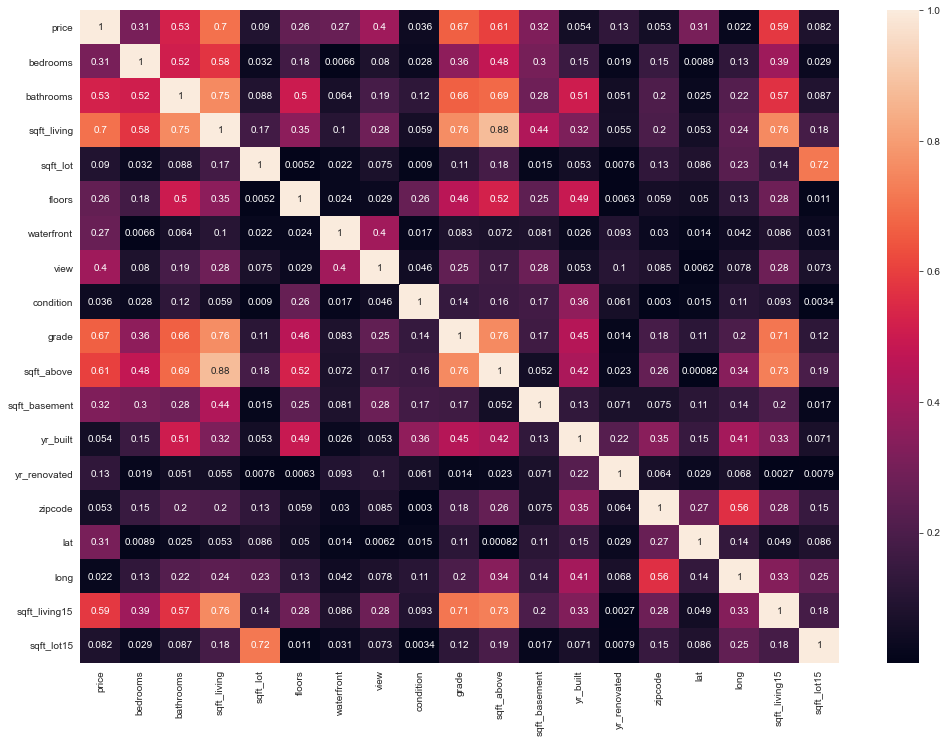

In [9]:
corr_kc = kc.corr().abs()
plt.subplots(figsize=(17,12))
sns.heatmap(corr_kc,annot=True)

In [10]:
kc.corr()['price'].sort_values()

zipcode         -0.053203
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308350
sqft_basement    0.323816
view             0.397293
bathrooms        0.525138
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

#### Grade v/s Price

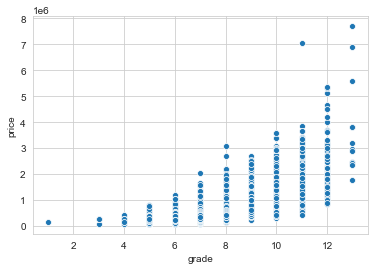

In [11]:
sns.scatterplot(x=kc['grade'],y=kc['price'])

#### Condition v/s Price

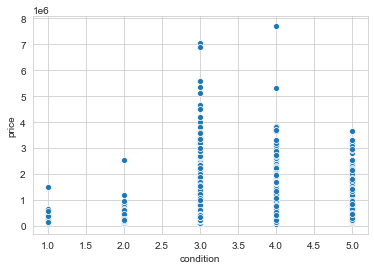

In [12]:
sns.scatterplot(x=kc['condition'],y=kc['price'])

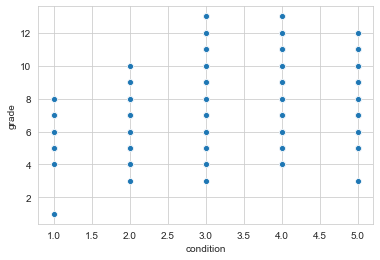

In [13]:
sns.scatterplot(x=kc['condition'],y=kc['grade'])

In [14]:
kc['year'] = kc['date'].apply(lambda date : date.year)
kc['month'] = kc['date'].apply(lambda date : date.month)

#### Month v/s Price

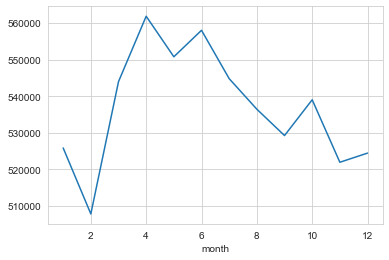

In [15]:
kc.groupby('month').mean()['price'].plot()

#### Year v/s Price

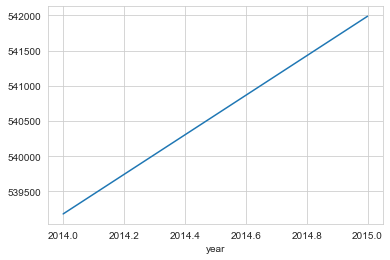

In [16]:
kc.groupby('year').mean()['price'].plot()

#### Trying to find most popular choice in terms of bedrooms

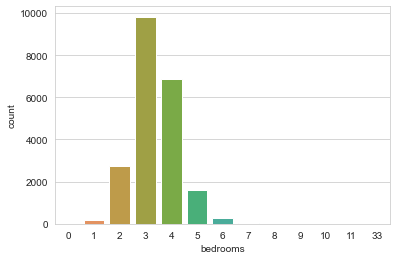

In [17]:
sns.countplot(kc['bedrooms'])

#### Number of Bedrooms v/s Price

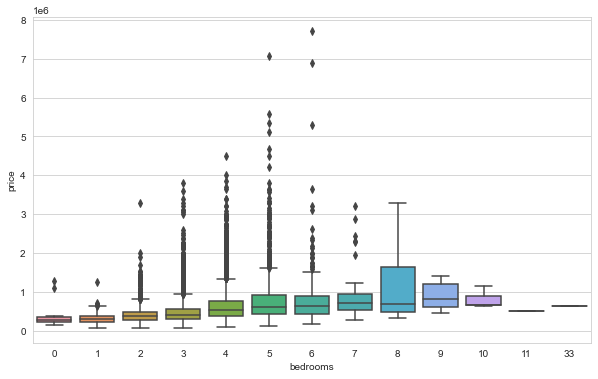

In [18]:
plt.figure(figsize=(10,6))
sns.boxplot(data=kc,x='bedrooms',y='price')

#### Living Area v/s Price

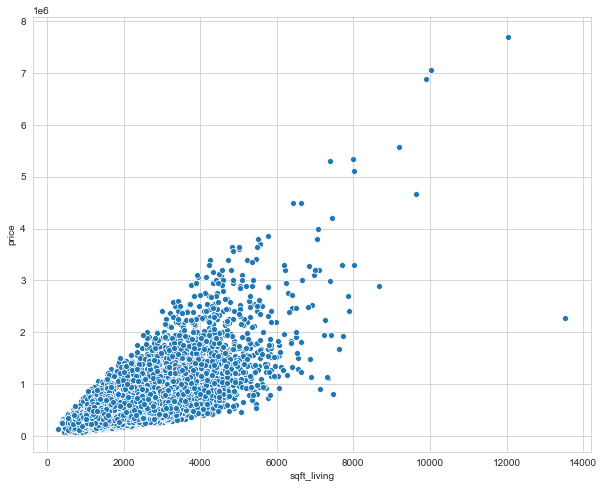

In [19]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='sqft_living',y='price',data=kc)

### Exploratory Data Analysis - USA_Housing

In [20]:
usa.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [21]:
addr = usa['Address']
states = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", 
          "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
          "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
          "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]

In [22]:
usa.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [23]:
temp = []

for item in addr:
    a = item.split(',')
    
    if len(a) == 1:
        temp.append(0)
        continue
        
    else:
        s = a[1][1:3]
        
        if s in states:
            temp.append(s)
            
        else:
            temp.append(0)
        
        
 
    

In [24]:
usa['Address'] = temp
usa = usa[usa['Address']!=0]

### Grouping Data to get state-wise numbers

In [25]:
df = usa.groupby(by='Address').mean()

In [26]:
df.drop(['Area Population'],axis=1,inplace=True)

df['Population'] = usa.groupby("Address")["Area Population"].sum()

df.reset_index(inplace=True)

df

,Address,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Price,Population
0,AK,70828.611503,6.059981,7.139441,4.185970,1.337328e+06,2.478336e+06
1,AL,67870.307215,5.961295,6.983896,3.747286,1.211095e+06,2.520774e+06
2,AR,68547.513268,5.863189,6.852859,3.687681,1.157449e+06,2.354779e+06
3,AZ,70371.934724,6.048773,6.945581,4.038837,1.271942e+06,3.100617e+06
4,CA,67629.397058,5.884912,7.096434,3.993077,1.212372e+06,2.807373e+06
5,CO,69904.348940,6.110985,7.205118,4.068667,1.299452e+06,2.693561e+06
6,CT,71221.648745,5.735917,6.949656,3.881081,1.270711e+06,2.733973e+06
7,DC,69286.964128,5.949108,6.991146,3.875309,1.245905e+06,3.005716e+06
8,DE,67360.863099,6.075315,6.877584,3.932135,1.210077e+06,3.317684e+06
9,FL,67908.637997,6.150271,7.213524,4.182000,1.244342e+06,2.606566e+06


In [27]:
print("Null Values in USA_Housing dataset\n")
df.isnull().sum()

Null Values in USA_Housing dataset



Address                         0
Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Price                           0
Population                      0
dtype: int64

#### To find the priceband of the majority of the house purchases

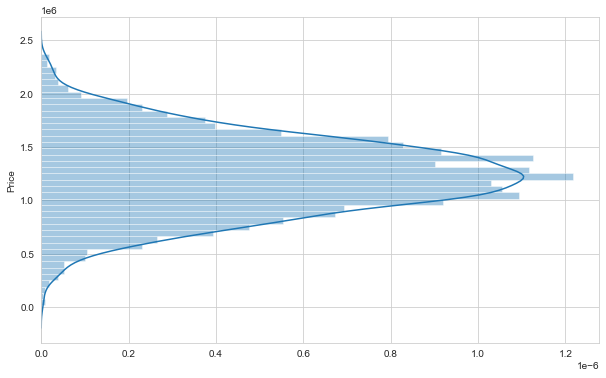

In [28]:
plt.figure(figsize=(10,6))
sns.distplot(usa['Price'],vertical=True)

#### Finding the relation between Price and the other factors in the dataset

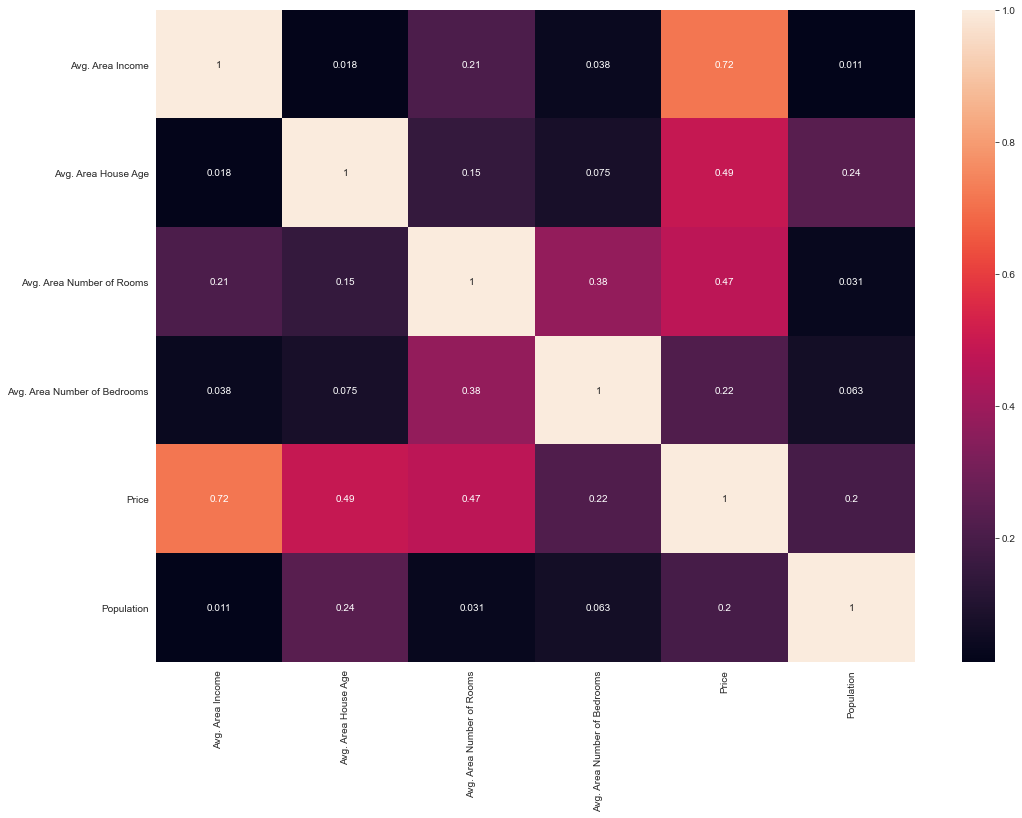

In [29]:
corr_usa = df.corr().abs()
plt.subplots(figsize=(17,12))
sns.heatmap(corr_usa,annot=True)

In [30]:
usa.corr()['Price'].sort_values()

Avg. Area Number of Bedrooms    0.162163
Avg. Area Number of Rooms       0.324501
Area Population                 0.409645
Avg. Area House Age             0.445759
Avg. Area Income                0.640346
Price                           1.000000
Name: Price, dtype: float64

### State wise plots for Price, Income and Population

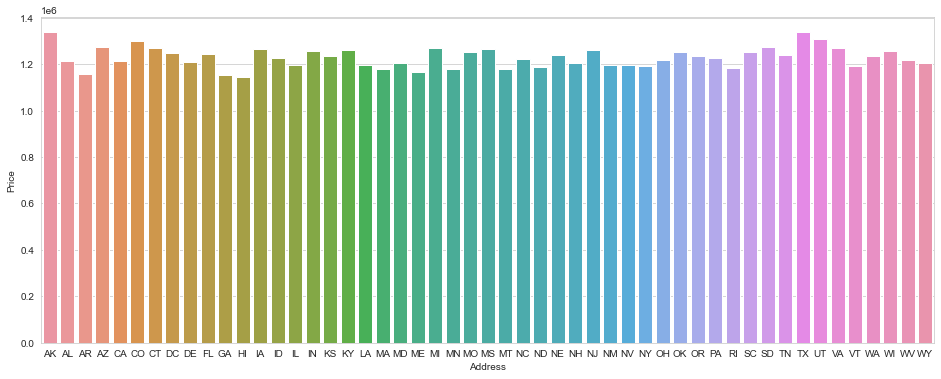

In [31]:
plt.subplots(figsize=(16,6))
sns.barplot(x="Address",y='Price',data=df)

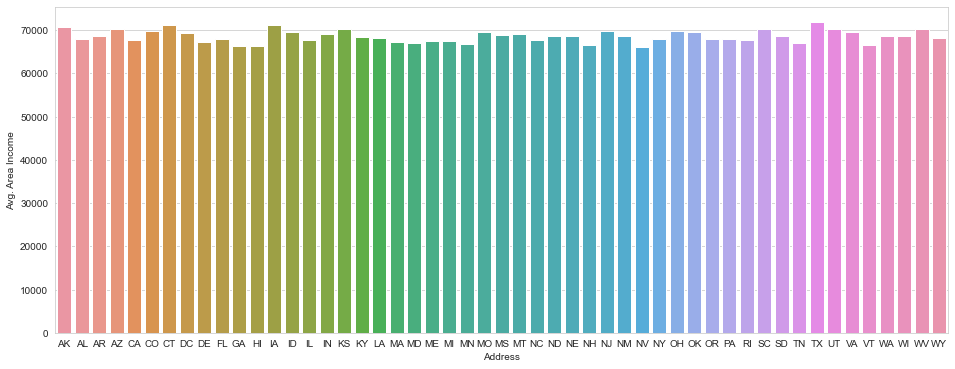

In [32]:
plt.subplots(figsize=(16,6))
sns.barplot(data=df,x='Address',y='Avg. Area Income')

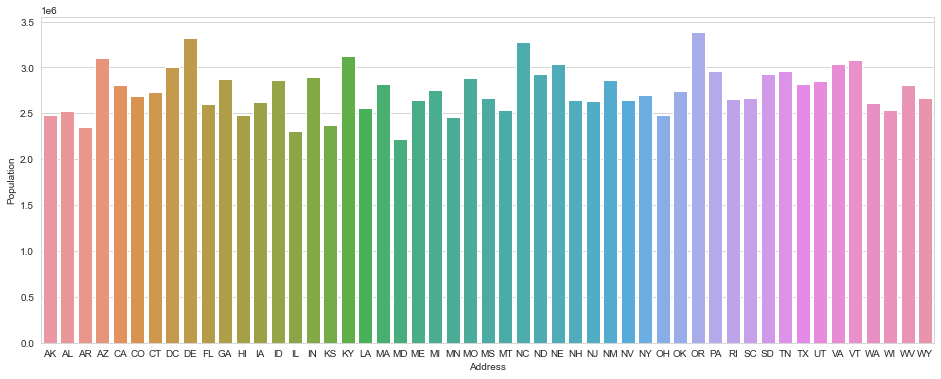

In [33]:
plt.subplots(figsize=(16,6))
sns.barplot(data=df,x='Address',y='Population')

#### Relation between Income and Price

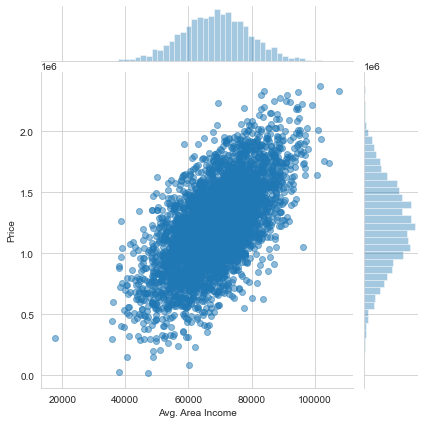

In [34]:
sns.jointplot(x='Avg. Area Income',y='Price',data=usa,alpha=0.5)

#### Relation between House Age and Price

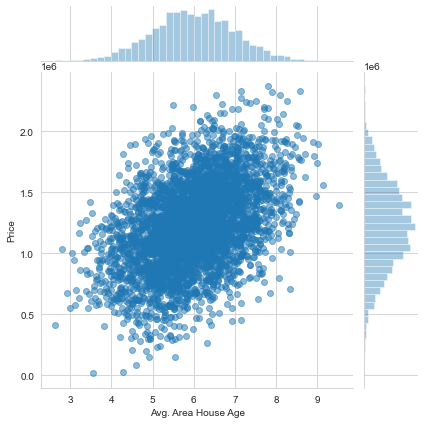

In [35]:
sns.jointplot(x='Avg. Area House Age',y='Price',data=usa,alpha=0.5)

#### Relation between Number of Bedrooms and Price

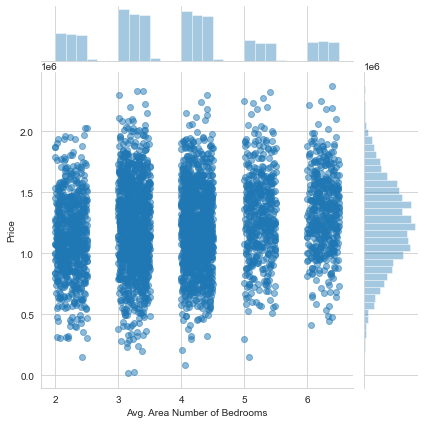

In [36]:
sns.jointplot(x='Avg. Area Number of Bedrooms',y='Price',data=usa,alpha=0.5)

# Conclusion 

## Factors that can potentially affect residential property prices
>### **1. Income**
>> In the analysis of the USA_Housing datset we can see a clear relation between the housing prices and the average income of the area in which the house is situated this is primarily attributed to the fact that people who earn more can afford to live in areas with better amenities and people who earn a similar income are highly likely to be neighbours.
>
>### **2. Grade/Condition of the house**
>> From the analysis of the King County Dataset we can clearly see that houses that are in good shape can command a premium over houses that are not. However, customers seem to prefer houses that are in an average condition (3/5) probably to ensure that they get best value for money as they would anyway have to make modifications to the house to suit their specific requirements.
>
>### **3. Living Area (sq.ft) / Number of Bedrooms/Bathrooms**
>> The Living Area available in a house and the number of bedrooms/bathrooms also seem to impact prices in the analysis of both the datasets. However the sweetspot with respect to the number of bedrooms seem to be 3-5 , this is highly supportive of the fact that living as a nuclear/elementary family has taken a prefernce over living with the extended family and the same is highly observed in states that have a larger urban population . This is also supports the distribution of a large variety of houses sold that lie in the price band corresponding to typical 3-5 bedroom  houses .
>
>### **4. Neighbourhood Amenities / Locality**
>> A quick research indicates that people will happily spend more for houses in areas that have good schools,  quick and easy access to healthcare, easy access to public transportation facilities and low crime rates. 
>
>### **5. Month of Purchase**
>> The analysis of the King County dataset indicates that though the prices are rising year after year , there is a difference in price depending on the month of purchase . People tend to pay much lesser during the period of Autumn/Winter (Oct,Nov,Dec,Jan & Feb) when compared to Spring/Summer (Mar,Apr,May & Jun) as the prices tend to peak at those time periods .
>
>### **6. Interest Rate / Ability to get a mortgage**
>> Most of the buyers seek a mortgage on their houses and the ability to obtain one at a low interest rate will encourage buyers to make a purchase without a second thought but generally the growing imbalances in the mortgage credit market tend to bring down house prices in the long run, whereas in the short term increases in mortgage credit appear to bring about a rise in house prices.
>
>### **7. Household Amenities / Luxuries**
>> The availability of luxuries like swimming pools, flooring that uses premium materials, great view, waterfront propeties etc and other such factors that boosts one's social status will definitely impact house prices . This trend is strongly seen in houses on the higher end of the price spectrum that typically attract the elite but is often ignored by the common man as their tighter budget restrictions do not allow them to even consider such houses.
>
>### **8. Overall Condition of the Economy**
>> When the econoomy is stable , people will have a sense of job security and will be more willing to make bigger purchases but when the economy is in a really bad shape like we've seen during the Covid - 19 Pandemic , people are more concerned about their health,families and their jobs and this insecurity will drive people away from making such big purchases and hence the chance for prices to drop in such situations is drasically high



